<a href="https://colab.research.google.com/github/Reben80/Data110-32213/blob/main/W4_HW_Scraping_Box_Office_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scraping Box Office Data Using BeautifulSoup and Requests

This Python script automates the process of extracting box office data from BoxOfficeMojo's weekend chart. Utilizing the `requests` library, it fetches the webpage content and employs `BeautifulSoup` for parsing the HTML to isolate the box office table. The script meticulously iterates through table rows, capturing essential details such as rank, release, gross earnings, and more, for each movie listed. The extracted data is then structured and saved into a CSV file named "box_office_data.csv". This approach facilitates easy aggregation, analysis, and storage of box office performance data for further analysis or reporting.


In [103]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# NOTE FOR THE PROFESSOR: originally the url was https://www.boxofficemojo.com/weekend/chart/ but that didn't work
url = "https://www.boxofficemojo.com/weekend/2024W04/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Use the correct class or id for the table
table = soup.find('table', {'class': 'mojo-body-table'})

data = []

if table:
    rows = table.find_all('tr')[1:]  # Assuming the first row is the header

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 9:  # Ensure there are enough cells
            entry = {
                'rank': cells[0].text.strip(),
                'release': cells[1].text.strip(),
                'Title': cells[2].text.strip(),
                'lw': cells[3].text.strip(),
                'percentage': cells[4].text.strip(),
                'change': cells[5].text.strip(),
                'average': cells[6].text.strip(),
                'gross': cells[7].text.strip(),
                'Total Gross': cells[8].text.strip(),
                 'distributor': cells[9].text.strip() if len(cells) > 9 else ''
            }
            data.append(entry)

    if data:
        csv_file = "box_office_data.csv"
        with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=data[0].keys())
            writer.writeheader()
            for item in data:
                writer.writerow(item)
        print(f"Data saved to {csv_file}")
    else:
        print("No data extracted from the table.")
else:
    print("Table not found in the page.")


Data saved to box_office_data.csv


In [105]:
df=pd.read_csv('box_office_data.csv')
df.head()


,rank,release,Title,lw,percentage,change,average,gross,Total Gross,distributor
0,1,1,Mean Girls,"$6,902,347",-40.8%,"3,544",-282,"$1,947","$60,407,842",3
1,2,2,The Beekeeper,"$6,679,878",-22.4%,"3,337",+7,"$2,001","$41,546,787",3
2,3,3,Wonka,"$5,662,213",-15.7%,"3,014",-122,"$1,878","$194,925,218",7
3,4,4,Migration,"$4,897,555",-10.3%,-,-,-,"$101,001,215",6
4,5,5,Anyone But You,"$4,625,093",-14.4%,"2,885",-43,"$1,603","$71,020,631",6


# Choose only 6 movies
For this assinment, we do not need to choose all the moive, we only use need to use the first 6 movies... you can do this by creating a new dataset lets call it `data=df.head(6)`

In [106]:
# create the new dataframe and call it data ( look the the hint above)
data = df.head(6)



### Lets clean our data, by removeing $ and comma . and we create a new columnt we call it `Total Gross Cleaned' which you will use in your analysis

In [107]:

# This line is correct as per your DataFrame structure
data['Total Gross Cleaned'] = data['Total Gross'].str.replace(r'[\$,]', '', regex=True).astype(float)

data.head(6)




C:\Users\emmaf\AppData\Local\Temp\ipykernel_10756\2973554707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total Gross Cleaned'] = data['Total Gross'].str.replace(r'[\$,]', '', regex=True).astype(float)


,rank,release,Title,lw,percentage,change,average,gross,Total Gross,distributor,Total Gross Cleaned
0,1,1,Mean Girls,"$6,902,347",-40.8%,"3,544",-282,"$1,947","$60,407,842",3,60407842.0
1,2,2,The Beekeeper,"$6,679,878",-22.4%,"3,337",+7,"$2,001","$41,546,787",3,41546787.0
2,3,3,Wonka,"$5,662,213",-15.7%,"3,014",-122,"$1,878","$194,925,218",7,194925218.0
3,4,4,Migration,"$4,897,555",-10.3%,-,-,-,"$101,001,215",6,101001215.0
4,5,5,Anyone But You,"$4,625,093",-14.4%,"2,885",-43,"$1,603","$71,020,631",6,71020631.0
5,6,10,Poor Things,"$2,909,972",+36.6%,"2,300",+900,"$1,265","$24,654,769",8,24654769.0


# Task 1: Visualize Data with a Bar Graph

**Objective:** Create a bar graph to visualize the relationship between `Title` and `Weekend Gross` using the `data` DataFrame.

**Instructions:**

1. **Plotting**: Utilize matplotlib to create a bar graph that plots each movie title (`Title`) against its corresponding `Weekend Gross`.
2. **Adjustments**: Ensure the graph is readable and appropriately sized to effectively display the data.
3.  **Improvements**: List any aspects of the graph that could be improved.



Text(0, 0.5, 'Gross (in tens of millions)')

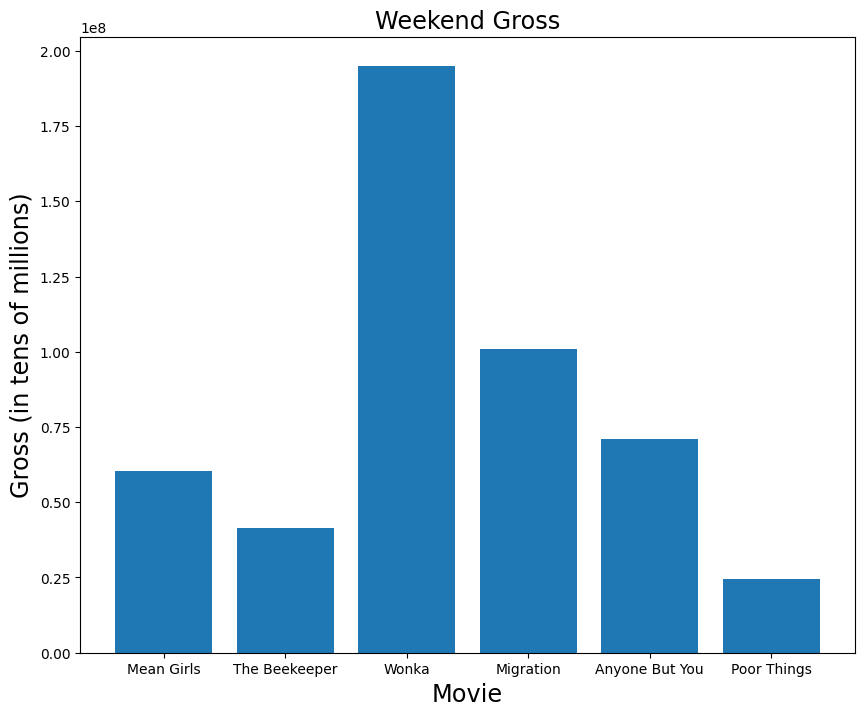

In [108]:
# Task 1 code need to be here
plt.figure(figsize=(10,8))
plt.bar(data['Title'], data['Total Gross Cleaned'])
plt.title('Weekend Gross', fontsize = 'xx-large' )
plt.xlabel('Movie', fontsize = 'xx-large' )
plt.ylabel('Gross (in tens of millions)', fontsize = 'xx-large' )

## Task 2: Correct Data Sorting and Create a Horizontal Bar Chart


 **Sort the Data**:
   Begin by sorting your data to ensure it's in the correct order for visualization. Use the `sort_values` method on your DataFrame. To sort the data in ascending order based on the 'Total Gross Cleaned' column, execute the following line of code:

   ````sorted_data = data.sort_values(by='Total Gross Cleaned', ascending=True)````


Text(0.5, 0, 'Gross (in tens of millions)')

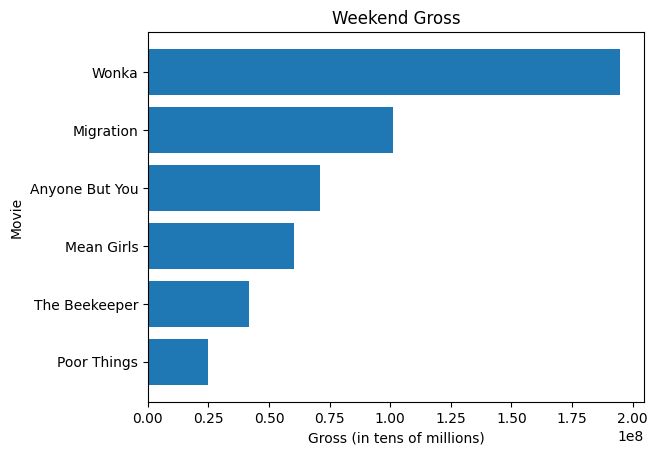

In [109]:
## Task 2 Code be need to be here

# Correcting the sorting method

sorted_data = data.sort_values(by='Total Gross Cleaned', ascending=True)

# Now plotting with matplotlib

plt.barh(sorted_data['Title'], sorted_data['Total Gross Cleaned'])
plt.title('Weekend Gross')
plt.ylabel('Movie')
plt.xlabel('Gross (in tens of millions)')



### Task 3:

To adjust the `Total Gross Cleaned` column values from dollars to millions and enhance readability by converting these values to integers, we need to divide each entry by 1,000,000. This transformation simplifies the data presentation, making large numbers more comprehensible. After dividing, it's recommended to convert the results to integers to remove any decimal points for a cleaner display. This approach is consistent with practices demonstrated in the [`week4.ipynb`](https://github.com/Reben80/Data110-32213/blob/bc90a812b1d18b9b2ff294ad10754ff19525160b/Week4.ipynb) notebook available on GitHub, which serves as a useful reference for this kind of data manipulation.


Text(0.5, 0, 'Total Gross (in millions $)')

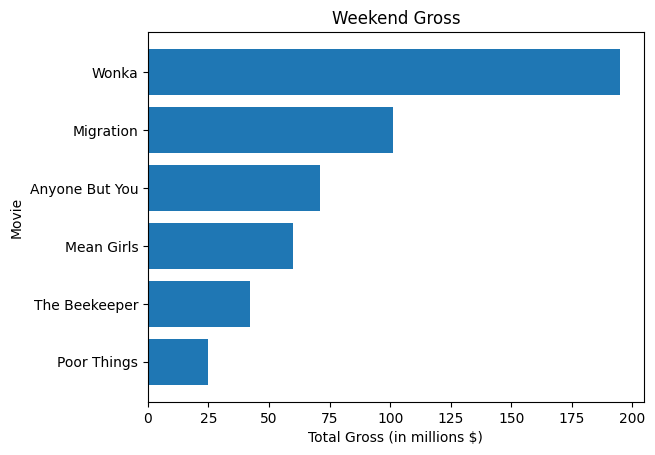

In [110]:
# Task 3 code  need to be here.
sorted_data['Total Gross Cleaned'] = sorted_data['Total Gross Cleaned'] / 1000000
sorted_data['Total Gross Cleaned'] = round(sorted_data['Total Gross Cleaned']).astype(int)

plt.barh(sorted_data['Title'], sorted_data['Total Gross Cleaned'])
plt.title('Weekend Gross')
plt.ylabel('Movie')
plt.xlabel('Total Gross (in millions $)')

## Task 4
create the final graph with the following specifications:

1. **Frameless Design**: Ensure the graph does not have an outer frame.
2. **Vertical Grid Only**: Include only vertical grid lines; remove any horizontal grid lines.
3. **Titles and Labels**: Add a meaningful title to the graph as well as labels for the X and Y axes to enhance readability.
4. **Figure Size**: Adjust the figure size to ensure it's suitable and makes the data easy to view and understand.
5. **Orientation**: The graph should be a horizontal bar chart to better display the data.

For detailed examples and guidance on implementing these features, please refer to the `week4.ipynb` notebook available at [ GitHub](https://github.com/Reben80/Data110-32213/blob/bc90a812b1d18b9b2ff294ad10754ff19525160b/Week4.ipynb). The notebook provides valuable insights into data visualization techniques, including how to adjust plot aesthetics to meet specific criteria.


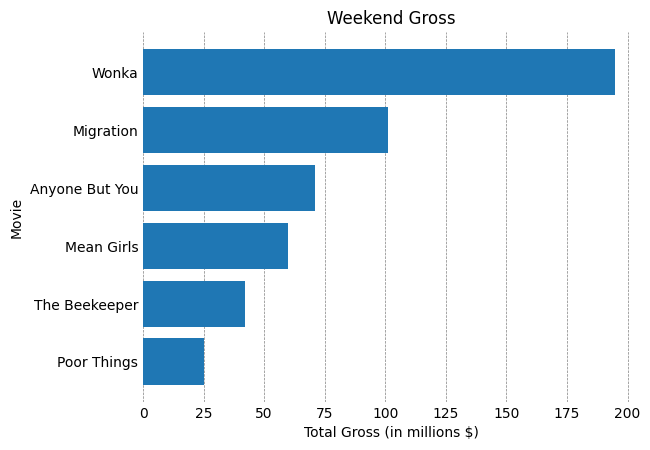

In [117]:
# Task 4 code  need to be here.

plt.barh(sorted_data['Title'], sorted_data['Total Gross Cleaned'])
plt.title('Weekend Gross')
plt.ylabel('Movie')
plt.xlabel('Total Gross (in millions of dollars)')

# Force gridlines to be drawn behind bars
ax = plt.gca()  # Get the current axes
ax.set_axisbelow(True)  # Ensure gridlines are below other elements

# Remove all borders except the grid
ax.spines['top'].set_visible(False)    # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
ax.spines['left'].set_visible(False)   # Remove the left spine
ax.spines['bottom'].set_visible(False) # Optionally, remove the bottom spine if no x-axis is needed

plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)


# Remove tick marks but keep the labels
ax.tick_params(axis='both', which='both', length=0)  # Set 'length' to 0 to remove ticks